In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded 74 total rows from 2 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003918  0.003813  0.017955  0.000164   
1               540  0.003700  0.003383  0.011694  0.000164   
2               530  0.003770  0.003487  0.013522  0.000164   
3               530  0.003770  0.003067  0.012377  0.000164   
4               520  0.003842  0.003209  0.012377  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  27                   20             0  
4                  26                   20             0  

Basic Stats:
       received packets   IAT_Mean    IAT_Std    IAT_Max    IAT_Min  \
count         74.000000  74.000000  74.000000  74.000000  74.000000   
mean         677.378378   0.003908   0.003865   0.015842   0.000164   
std  

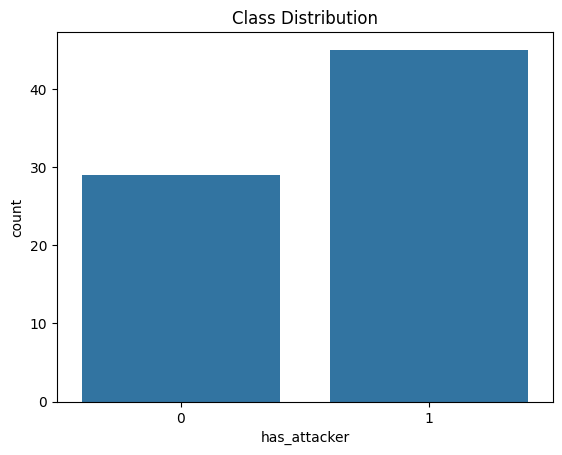


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.86      0.92        14

    accuracy                           0.91        23
   macro avg       0.91      0.93      0.91        23
weighted avg       0.93      0.91      0.91        23


Confusion Matrix:
[[ 9  0]
 [ 2 12]]


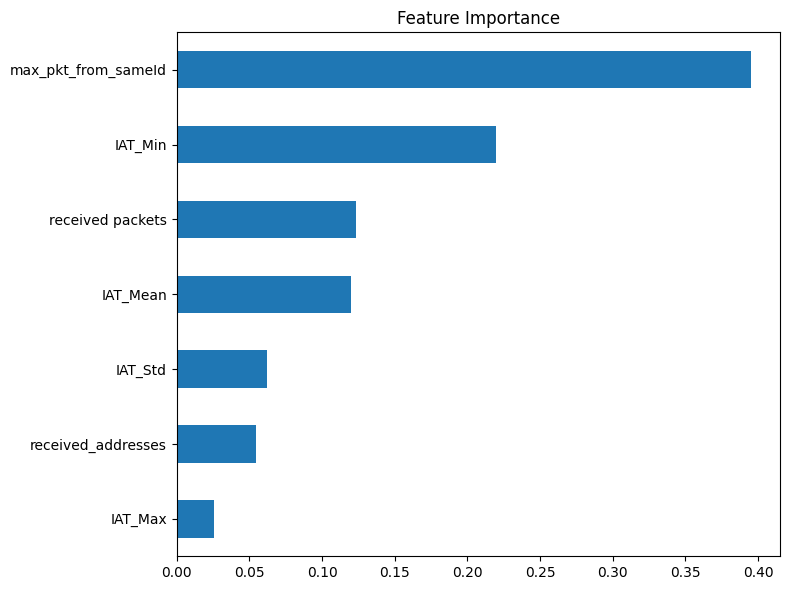

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 79 total rows from 4 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003918  0.003813  0.017955  0.000164   
1               540  0.003700  0.003383  0.011694  0.000164   
2               530  0.003770  0.003487  0.013522  0.000164   
3               530  0.003770  0.003067  0.012377  0.000164   
4               520  0.003842  0.003209  0.012377  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  27                   20             0  
4                  26                   20             0  

Basic Stats:
       received packets   IAT_Mean    IAT_Std    IAT_Max    IAT_Min  \
count         79.000000  79.000000  79.000000  79.000000  79.000000   
mean         635.772152   0.010293   0.008047   0.032362   0.002322   
std  

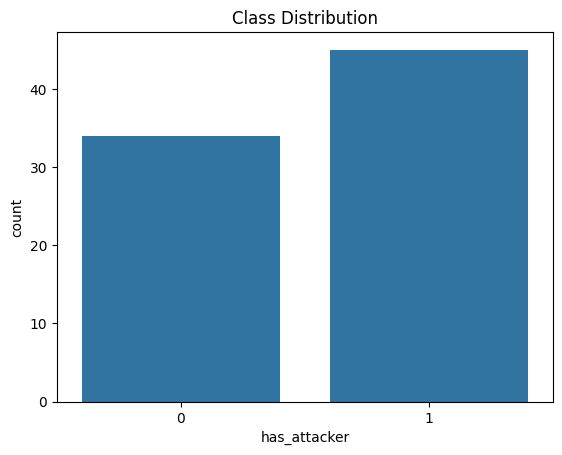


Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.86      0.92        14

    accuracy                           0.92        24
   macro avg       0.92      0.93      0.92        24
weighted avg       0.93      0.92      0.92        24


Confusion Matrix:
[[10  0]
 [ 2 12]]


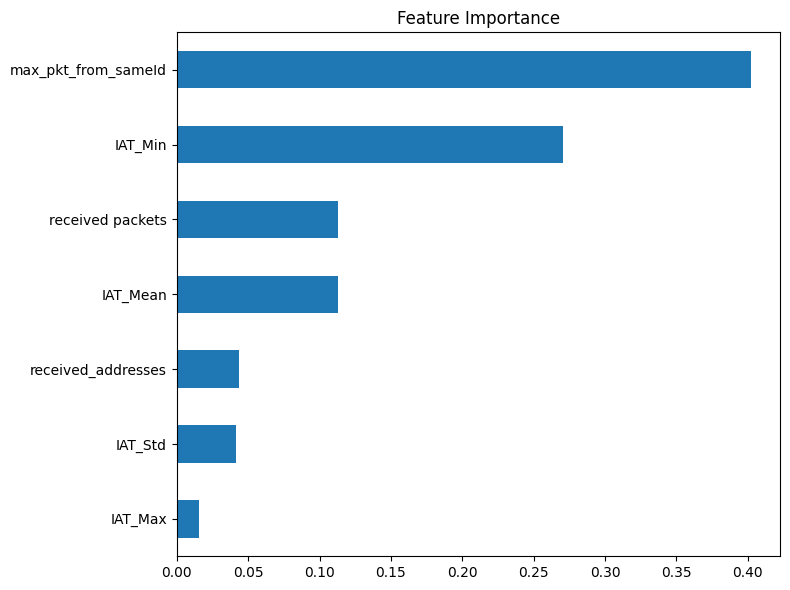

In [3]:
    # 'Dataset_timewin_22.json',
    # 'Dataset_timewin_28.json',
    # 'Dataset_timewin_40.json',
    # 'Dataset_timewin_46.json',
    # 'Dataset_timewin_52.json',
    # 'Dataset_timewin_58.json',
    # 'Dataset_timewin_64.json',
    # 'Dataset_timewin_76.json',
    # 'Dataset_timewin_70.json',
    # 'Dataset_timewin_82.json',
    # 'Dataset_timewin_88.json',
    # 'Dataset_timewin_94.json',
    # 'Dataset_timewin_100.json',
    # 'Dataset_timewin_106.json',
    # 'Dataset_timewin_454.json',
    # 'Dataset_timewin_448.json',
    # 'Dataset_timewin_442.json',
    # 'Dataset_timewin_436.json',
    # 'Dataset_timewin_430.json',
    # 'Dataset_timewin_208.json',
    # 'Dataset_timewin_424.json',
    # 'Dataset_timewin_418.json',
    # 'Dataset_timewin_406.json',
    # 'Dataset_timewin_412.json',
    # 'Dataset_timewin_400.json',
    # 'Dataset_timewin_394.json',
    # 'Dataset_timewin_388.json',
    # 'Dataset_timewin_382.json'

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json'

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 124 total rows from 8 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003918  0.003813  0.017955  0.000164   
1               540  0.003700  0.003383  0.011694  0.000164   
2               530  0.003770  0.003487  0.013522  0.000164   
3               530  0.003770  0.003067  0.012377  0.000164   
4               520  0.003842  0.003209  0.012377  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  27                   20             0  
4                  26                   20             0  

Basic Stats:
       received packets    IAT_Mean     IAT_Std     IAT_Max     IAT_Min  \
count         124.00000  124.000000  124.000000  124.000000  124.000000   
mean          652.83871    0.008224    0.006853    0.027392    0.00

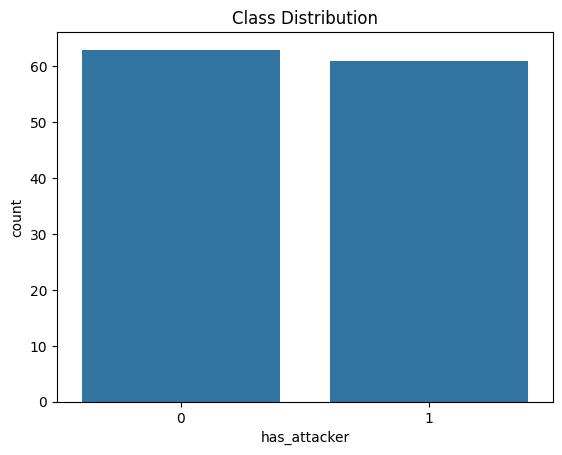


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


Confusion Matrix:
[[19  0]
 [ 2 17]]


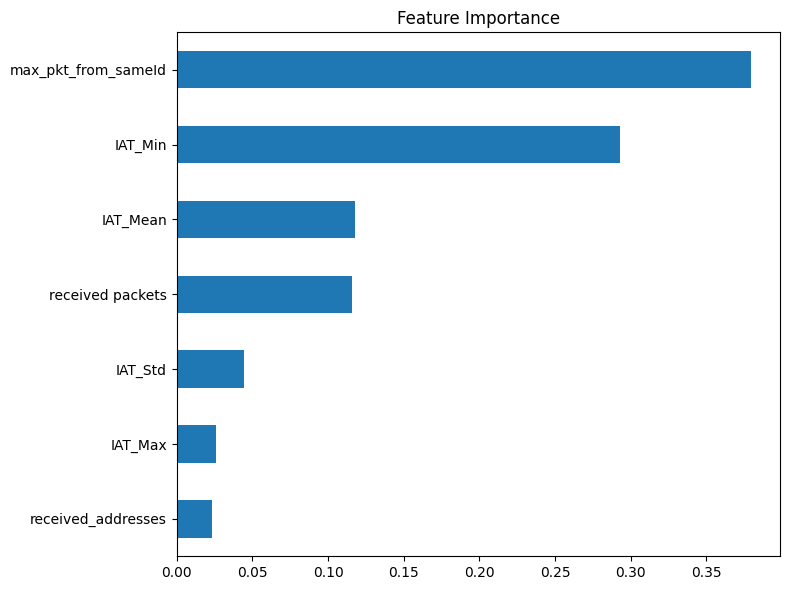

In [4]:
    # 'Dataset_timewin_22.json',
    # 'Dataset_timewin_28.json',
    # 'Dataset_timewin_40.json',
    # 'Dataset_timewin_46.json',
    # 'Dataset_timewin_52.json',
    # 'Dataset_timewin_58.json',
    # 'Dataset_timewin_64.json',
    # 'Dataset_timewin_76.json',
    # 'Dataset_timewin_70.json',
    # 'Dataset_timewin_82.json',
    # 'Dataset_timewin_454.json',
    # 'Dataset_timewin_448.json',
    # 'Dataset_timewin_442.json',
    # 'Dataset_timewin_436.json',
    # 'Dataset_timewin_430.json',
    # 'Dataset_timewin_208.json',
    # 'Dataset_timewin_424.json',
    # 'Dataset_timewin_418.json',
    # 'Dataset_timewin_406.json',
    # 'Dataset_timewin_412.json',
    # 'Dataset_timewin_400.json',
    # 'Dataset_timewin_394.json',
    # 'Dataset_timewin_388.json',
    # 'Dataset_timewin_382.json'

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json',
    'Dataset_timewin_88.json',
    'Dataset_timewin_94.json',
    'Dataset_timewin_100.json',
    'Dataset_timewin_106.json',

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 362 total rows from 16 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003918  0.003813  0.017955  0.000164   
1               540  0.003700  0.003383  0.011694  0.000164   
2               530  0.003770  0.003487  0.013522  0.000164   
3               530  0.003770  0.003067  0.012377  0.000164   
4               520  0.003842  0.003209  0.012377  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  27                   20             0  
4                  26                   20             0  

Basic Stats:
       received packets    IAT_Mean     IAT_Std     IAT_Max     IAT_Min  \
count        362.000000  362.000000  362.000000  362.000000  362.000000   
mean         645.262431    0.012819    0.006403    0.030801    0.0

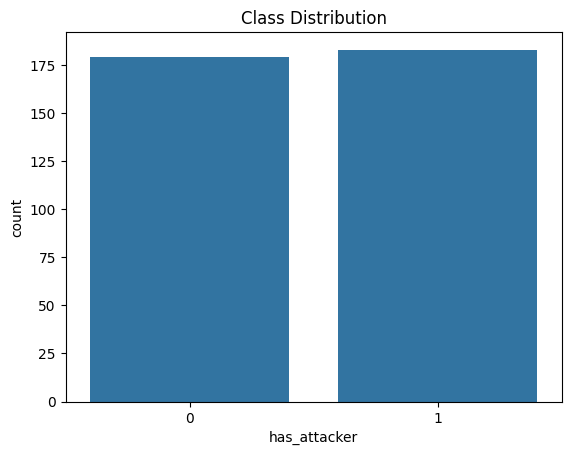


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.96      0.98        55

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109


Confusion Matrix:
[[54  0]
 [ 2 53]]


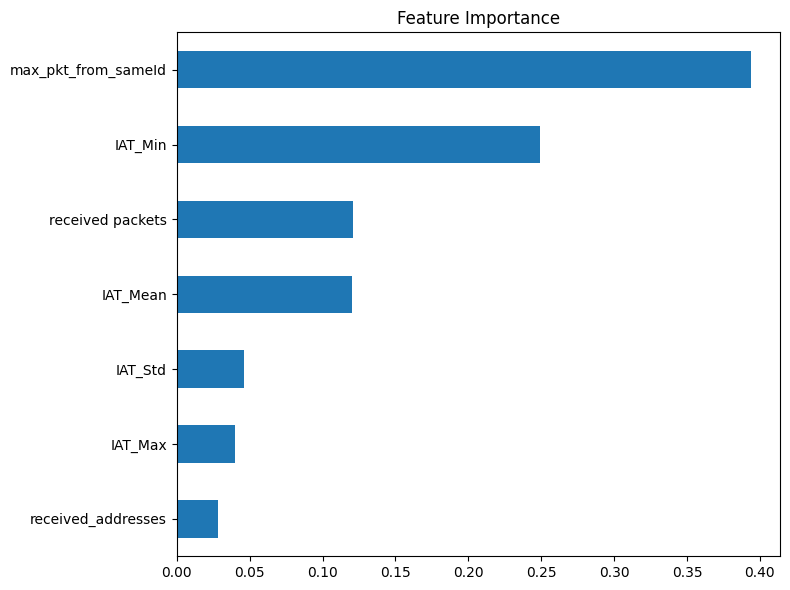

In [5]:

    # 'Dataset_timewin_70.json',
    # 'Dataset_timewin_82.json',
    # 'Dataset_timewin_454.json',
    # 'Dataset_timewin_448.json',
    # 'Dataset_timewin_442.json',
    # 'Dataset_timewin_436.json',
    # 'Dataset_timewin_430.json',
    # 'Dataset_timewin_208.json',
    # 'Dataset_timewin_424.json',
    # 'Dataset_timewin_418.json',
    # 'Dataset_timewin_406.json',
    # 'Dataset_timewin_412.json',
    # 'Dataset_timewin_400.json',
    # 'Dataset_timewin_394.json',
    # 'Dataset_timewin_388.json',
    # 'Dataset_timewin_382.json'

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json',
    'Dataset_timewin_88.json',
    'Dataset_timewin_94.json',
    'Dataset_timewin_100.json',
    'Dataset_timewin_106.json',
    'Dataset_timewin_22.json',
    'Dataset_timewin_28.json',
    'Dataset_timewin_40.json',
    'Dataset_timewin_46.json',
    'Dataset_timewin_52.json',
    'Dataset_timewin_58.json',
    'Dataset_timewin_64.json',
    'Dataset_timewin_76.json',

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 530 total rows from 32 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003918  0.003813  0.017955  0.000164   
1               540  0.003700  0.003383  0.011694  0.000164   
2               530  0.003770  0.003487  0.013522  0.000164   
3               530  0.003770  0.003067  0.012377  0.000164   
4               520  0.003842  0.003209  0.012377  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  27                   20             0  
4                  26                   20             0  

Basic Stats:
       received packets    IAT_Mean     IAT_Std     IAT_Max     IAT_Min  \
count        530.000000  530.000000  530.000000  530.000000  530.000000   
mean         561.205660    0.016695    0.009903    0.049930    0.0

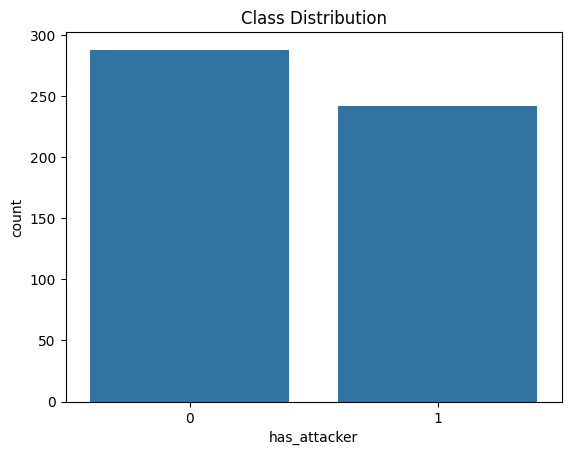


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      0.97      0.99        73

    accuracy                           0.99       159
   macro avg       0.99      0.99      0.99       159
weighted avg       0.99      0.99      0.99       159


Confusion Matrix:
[[86  0]
 [ 2 71]]


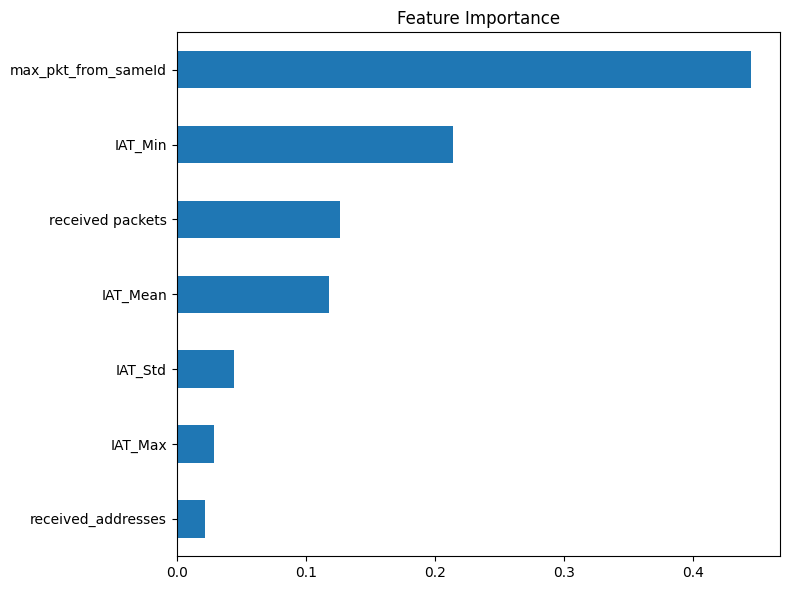

In [6]:


import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json',
    'Dataset_timewin_88.json',
    'Dataset_timewin_94.json',
    'Dataset_timewin_100.json',
    'Dataset_timewin_106.json',
    'Dataset_timewin_22.json',
    'Dataset_timewin_28.json',
    'Dataset_timewin_40.json',
    'Dataset_timewin_46.json',
    'Dataset_timewin_52.json',
    'Dataset_timewin_58.json',
    'Dataset_timewin_64.json',
    'Dataset_timewin_76.json',
    
    'Dataset_timewin_70.json',
    'Dataset_timewin_82.json',
    'Dataset_timewin_454.json',
    'Dataset_timewin_448.json',
    'Dataset_timewin_442.json',
    'Dataset_timewin_436.json',
    'Dataset_timewin_430.json',
    'Dataset_timewin_208.json',
    'Dataset_timewin_424.json',
    'Dataset_timewin_418.json',
    'Dataset_timewin_406.json',
    'Dataset_timewin_412.json',
    'Dataset_timewin_400.json',
    'Dataset_timewin_394.json',
    'Dataset_timewin_388.json',
    'Dataset_timewin_382.json'

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 1315 total rows from 76 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               309  0.006466  0.007450  0.030751  0.000215   
1               370  0.005400  0.005342  0.019057  0.000215   
2               340  0.005876  0.007105  0.035768  0.000215   
3               320  0.006244  0.006556  0.025829  0.000683   
4               400  0.004995  0.005944  0.025841  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  17                   20             0  
1                  19                   20             0  
2                  19                   20             0  
3                  17                   20             0  
4                  21                   20             0  

Basic Stats:
       received packets     IAT_Mean      IAT_Std      IAT_Max      IAT_Min  \
count       1315.000000  1315.000000  1315.000000  1315.000000  1315.000000   
mean         547.970342     0.013857     0.010220     0.0

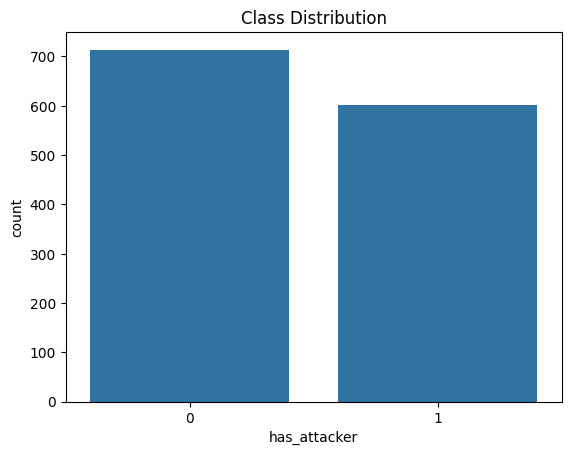

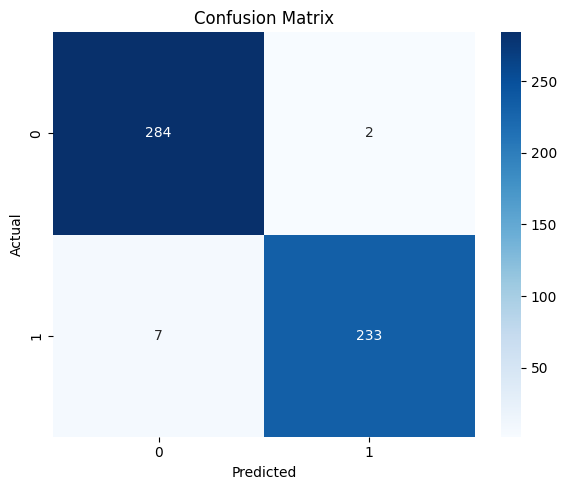


Accuracy Score:  0.9829
Precision Score: 0.9915
Recall Score:    0.9708
F1 Score:        0.9811

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       286
           1       0.99      0.97      0.98       240

    accuracy                           0.98       526
   macro avg       0.98      0.98      0.98       526
weighted avg       0.98      0.98      0.98       526


Confusion Matrix:
[[284   2]
 [  7 233]]


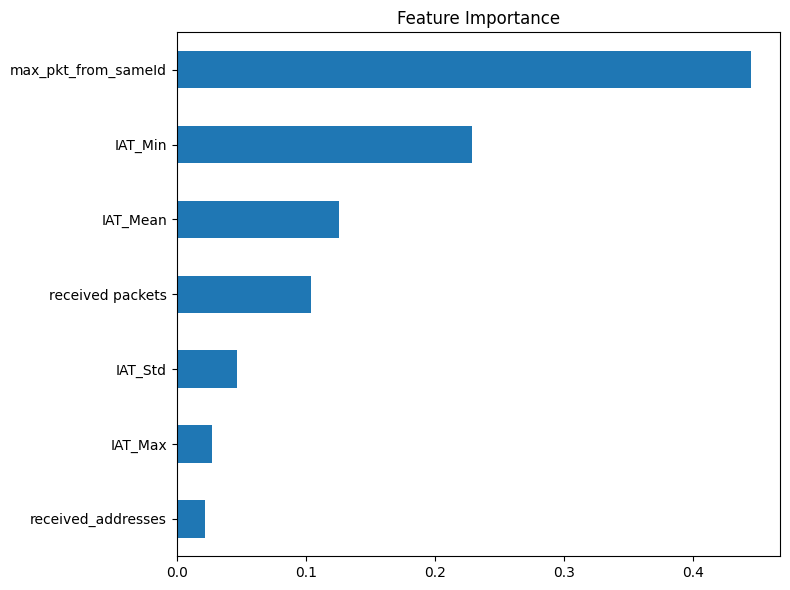

In [2]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.

file_list = glob.glob("Dataset_timewin_*.json")


# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === Accuracy and Other Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"\nAccuracy Score:  {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score:    {recall:.4f}")
print(f"F1 Score:        {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()